# Linear Regression Model for Car Data

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [27]:
car_data = pd.read_csv("auto-mpg.csv")

In [28]:
car_data.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [29]:
car_data.corr()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
mpg,1.000000,-0.775396,-0.804203,-0.831741,0.420289,0.579267,0.563450
cylinders,-0.775396,1.000000,0.950721,0.896017,-0.505419,-0.348746,-0.562543
displacement,-0.804203,0.950721,1.000000,0.932824,-0.543684,-0.370164,-0.609409
weight,-0.831741,0.896017,0.932824,1.000000,-0.417457,-0.306564,-0.581024
acceleration,0.420289,-0.505419,-0.543684,-0.417457,1.000000,0.288137,0.205873
model year,0.579267,-0.348746,-0.370164,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.581024,0.205873,0.180662,1.000000


In [30]:
car_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [31]:
car_data.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [32]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [33]:
car_data['horsepower'] = car_data['horsepower'].apply(lambda x: x if x != "?" else 96.0)


In [34]:
car_data['horsepower'] = car_data['horsepower'].astype(float)

In [35]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


In [36]:
car_data.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
mpg,1.000000,-0.775396,-0.804203,-0.773077,-0.831741,0.420289,0.579267,0.563450
cylinders,-0.775396,1.000000,0.950721,0.840841,0.896017,-0.505419,-0.348746,-0.562543
displacement,-0.804203,0.950721,1.000000,0.895389,0.932824,-0.543684,-0.370164,-0.609409
horsepower,-0.773077,0.840841,0.895389,1.000000,0.862110,-0.686133,-0.413303,-0.452503
weight,-0.831741,0.896017,0.932824,0.862110,1.000000,-0.417457,-0.306564,-0.581024
acceleration,0.420289,-0.505419,-0.543684,-0.686133,-0.417457,1.000000,0.288137,0.205873
model year,0.579267,-0.348746,-0.370164,-0.413303,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.452503,-0.581024,0.205873,0.180662,1.000000


In [37]:
car_data['origin'] = car_data['origin'].replace({1:"america",2:"europe",3:'asia'})

In [38]:
car_data =  pd.get_dummies(car_data, columns=['origin'])

In [39]:
car_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name,origin_america,origin_asia,origin_europe
0,18.0,8,307.0,130.0,3504,12.0,70,chevrolet chevelle malibu,1,0,0
1,15.0,8,350.0,165.0,3693,11.5,70,buick skylark 320,1,0,0
2,18.0,8,318.0,150.0,3436,11.0,70,plymouth satellite,1,0,0
3,16.0,8,304.0,150.0,3433,12.0,70,amc rebel sst,1,0,0
4,17.0,8,302.0,140.0,3449,10.5,70,ford torino,1,0,0


In [42]:
car_data.iloc[:,:7]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
0,18.0,8,307.0,130.0,3504,12.0,70
1,15.0,8,350.0,165.0,3693,11.5,70
2,18.0,8,318.0,150.0,3436,11.0,70
3,16.0,8,304.0,150.0,3433,12.0,70
4,17.0,8,302.0,140.0,3449,10.5,70
...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82
394,44.0,4,97.0,52.0,2130,24.6,82
395,32.0,4,135.0,84.0,2295,11.6,82
396,28.0,4,120.0,79.0,2625,18.6,82


In [43]:
car_attrib = car_data.iloc[:,:7]

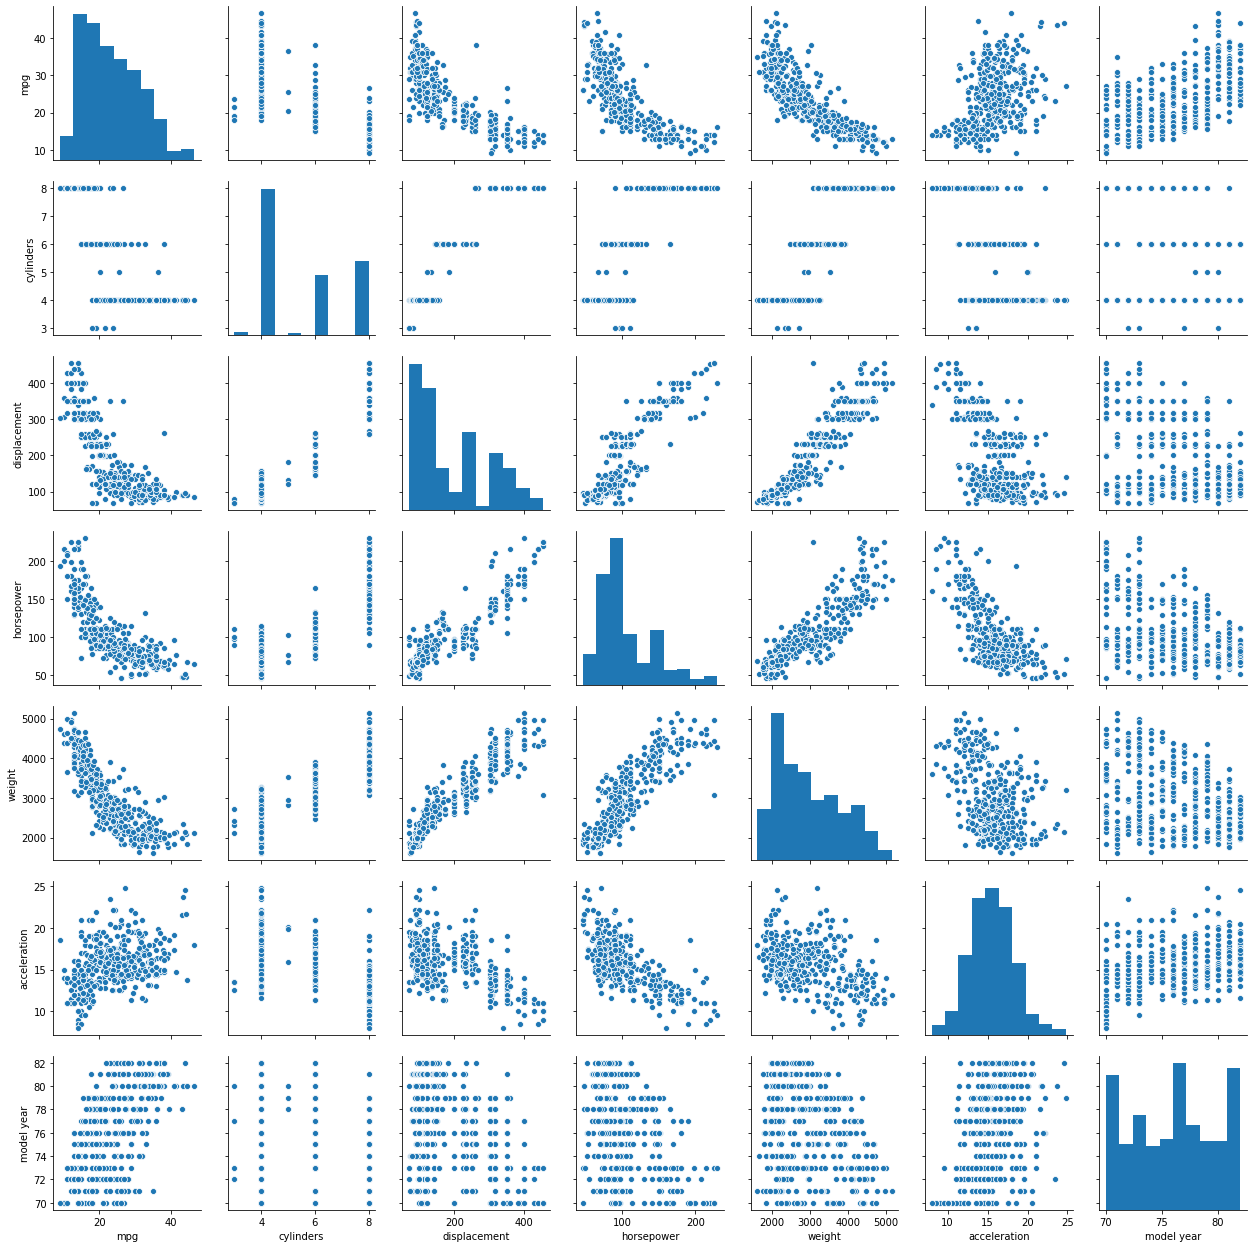

In [44]:
sns.pairplot(car_attrib)

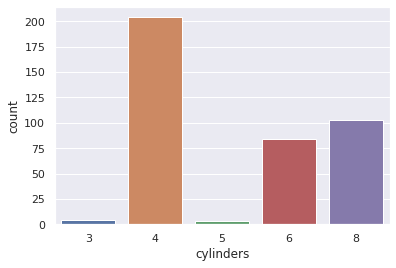

In [117]:
sns.set()
sns.countplot(car_data['cylinders'])

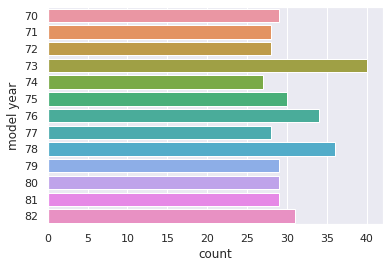

In [119]:
sns.countplot(y=car_data['model year'])

## Start building Linear Regression Model

In [88]:
X = car_data.drop(['mpg','car name','origin_europe'],axis=1)
y = car_data[['mpg']]

In [94]:
X

,cylinders,displacement,horsepower,weight,acceleration,model year,origin_america,origin_asia
0,8,307.0,130.0,3504,12.0,70,1,0
1,8,350.0,165.0,3693,11.5,70,1,0
2,8,318.0,150.0,3436,11.0,70,1,0
3,8,304.0,150.0,3433,12.0,70,1,0
4,8,302.0,140.0,3449,10.5,70,1,0
...,...,...,...,...,...,...,...,...
393,4,140.0,86.0,2790,15.6,82,1,0
394,4,97.0,52.0,2130,24.6,82,0,0
395,4,135.0,84.0,2295,11.6,82,1,0
396,4,120.0,79.0,2625,18.6,82,1,0


In [89]:
# Apply Splits
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=1)

In [90]:
regression_model = LinearRegression()

In [91]:
regression_model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [92]:
regression_model.score(X_train,y_train)

0.8141001226550391

In [93]:
regression_model.score(X_test,y_test)

0.8432729380795778

In [115]:
regression_model.predict(np.array([6,300,197,3450,10,70,0,1]).reshape(1, -1))

array([[16.98258685]])